In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Borrador para DFS 

## 1) Crear imagenes por cada paso

In [139]:
["#5583ba"] * 10

['#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba',
 '#5583ba']

In [142]:
range(9)

range(0, 9)

In [143]:
list(range(9)) # Cuando hacemos un casteo a list perdemos el ultimo

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [145]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [146]:
len(range(9))

9

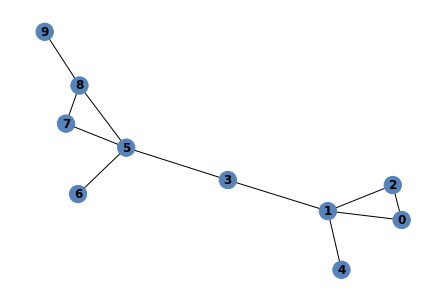

In [144]:
nodes = range(9)
edges = [(0,1), (0,2), (1,2), (1,3), (1,4), (3,5), (5,6), (5,7), (5,8), (7,8), (8, 9)]
color_map=["#5583ba"] * 10
#color_map[9] = "#84c05d"
g = nx.Graph()
g.add_nodes_from(nodes)  # Cuando se pasa un range(9) si son los nuevo inclusive
g.add_edges_from(edges)
pos = nx.spring_layout(g)

# nx.draw_networkx_nodes(g, pos, node_size=200, node_color='#00b4d9')   # Dibuja solo los nodos
# nx.draw_networkx_edges(g, pos)                                        # Dibuja solo las aristas
# nx.draw(g, with_labels=True, font_weight='bold',node_color='#00b4d9') # Dibuja nodos de un color en especifico y lines

nx.draw(g, node_color=color_map, with_labels=True, font_weight='bold')
#plt.savefig("img/dfs/test.png") - Guarda la imagen de un grafo

In [67]:
i = 0  # Variable global para el nombre de las imagnes
def bfs(g, initial, visited=None, color_map=None, pos=None):
    """Devuelme un camino de la trayectoria que siguio el algoritmo"""
    global i
    if visited is None:
        visited = [False] * len(g)       
    visited[initial] = True    
    if color_map is not None:
        color_map[initial] = "#84c05d"        
        nx.draw(g, pos=pos, node_color=color_map, with_labels=True, font_weight='bold')
        plt.savefig("img/dfs/process{0}.png".format(i))
        plt.close()
    print(initial, end=" ")
    for node_adj in g.adj[initial]:
        if not visited[node_adj]:            
            i += 1
            bfs(g, node_adj, visited, color_map, pos)
    # print('i: {}'.format(i)) # Aqui podemos vernos el backtrack
    return

In [68]:
nodes = range(9)
edges = [(0,1), (0,2), (1,2), (1,3), (1,4), (3,5), (5,6), (5,7), (5,8), (7,8), (8, 9)]
color_map=["#5583ba" for i in range(10)]
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = nx.spring_layout(g)
bfs(g, 0, color_map=color_map, pos=pos)

0 1 2 3 5 6 7 8 9 4 

Funciona correctamente, pero el problema que podemos encontrar es que estamos dibujando la grafica por lo que la posicion de los nodos cambia, y no es la mejor visualizacion.

La mejor opcion es crear los nodos y aristas fijas e ir cambiando los colores, pero de los nodos fijos

~~~
   # draw graph
    nodes = nx.draw_networkx_nodes(G, pos, *args, **kwargs)
    edges = nx.draw_networkx_edges(G, pos, *args, **kwargs)
~~~
Solucion pasar una pos en la funcion.

---

## Generar una animacion

Para realizar una animacion de nuestro algoritmo haremos un generador que nos traira el nodo visitado para dibuajarlo en el lienzo

In [107]:
def bfs(g, initial, visited=None, path=None):
    """Devuelme un camino de la trayectoria que siguio el algoritmo"""    
    if visited is None:
        visited = [False] * len(g)
        path = [] # Ira agregando los nodos conforme fueron descubiertos
    visited[initial] = True    
    #print(initial, end=" ")
    path.append(initial)
    for node_adj in g.adj[initial]:
        if not visited[node_adj]:                
            bfs(g, node_adj, visited, path)
    # print('i: {}'.format(i)) # Aqui podemos vernos el backtrack
    return path

In [121]:
# Creando un generator comprehensions;
gen = (x for x in bfs(g, 0))

0 1 2 3 5 6 7 8 9 4 

In [125]:
next(gen)

3

In [135]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#plt.close('all')
import networkx as nx
import matplotlib.animation as animation

# Create graph
nodes = range(9)
edges = [(0,1), (0,2), (1,2), (1,3), (1,4), (3,5), (5,6), (5,7), (5,8), (7,8), (8, 9)]
num_nodes = len(range(9)) + 1 # Porque inicia en [0, 1, .... 9] con range(9)
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#node_colors = ["#5583ba"] * 10 not working
#node_colors = range(9)
#node_colors = [i for i in range(9)]
# num_nodes+1: porque inicia en 0 la cuenta, tendriamos en todad [0, 1, .... 9] con range(9)
node_colors = [0] * (num_nodes)  # Inicializamos todos a un color
velocidad = 700  # Entre mayor numero es mas lento la animacion

# draw graph
pos   = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos)

plt.axis('off')  # Eliminamos los ejes
fig = plt.gcf()  # Obtenemos la figure

# Algoritmo
# Creando un generator comprehensions
path = bfs(G, 0)
#print(f'Path: {path}')
gen = (x for x in path)

def update_plot(frames, nodes, node_colors):
    #print(frames)
    global gen
    # Ajustamos el cambio del color
    try:
        next_node = next(gen)
    except StopIteration:
        # Creamos un numero generador e inicializamos la cuenta
        gen = (x for x in path)
        next_node = next(gen)
    
    node_colors[next_node] = 1  # Change color
    #print(f'Next_node: {next_node}')
    #print(node_colors)
    # Cambiamos el color a todos con el arreglo
    nodes.set_array(node_colors)
    return nodes,

# Los frames se iran repitiendo una y otra vez en un bucle infinito
ani = animation.FuncAnimation(fig, update_plot, frames=num_nodes, interval=velocidad,
                                  fargs=(nodes, node_colors))
#ani.save('bfs.gif', writer='pillow')  ## Para guardarlo en un gif
plt.show()


In [13]:
[0] * 9

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [12]:
[i for i in range(9)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt; plt.close('all')
import networkx as nx
from matplotlib.animation import FuncAnimation

def animate_nodes(G, node_colors, pos=None, *args, **kwargs):

    # define graph layout if None given
    if pos is None:
        pos = nx.spring_layout(G)

    # draw graph
    nodes = nx.draw_networkx_nodes(G, pos, *args, **kwargs)
    edges = nx.draw_networkx_edges(G, pos, *args, **kwargs)
    plt.axis('off')

    def update(ii):
        # nodes are just markers returned by plt.scatter;
        # node color can hence be changed in the same way like marker colors
        print(ii)
        print(node_colors[ii])
        nodes.set_array(node_colors[ii])
        return nodes,

    fig = plt.gcf()
    animation = FuncAnimation(fig, update, interval=50, frames=len(node_colors), blit=True)
    return animation

total_nodes = 10
graph = nx.complete_graph(total_nodes)
time_steps = 20
node_colors = np.random.randint(0, 100, size=(time_steps, total_nodes))

animation = animate_nodes(graph, node_colors)
#animation.save('test.gif', writer='imagemagick', savefig_kwargs={'facecolor':'white'}, fps=0.5)
plt.show()

# https://stackoverflow.com/questions/50376066/what-tool-to-draw-an-animated-network-graph

In [4]:
total_nodes = 10
time_steps = 20
np.random.randint(0, 100, size=(time_steps, total_nodes))

array([[36, 10, 14, 47, 61, 57, 40,  4, 21, 33],
       [29, 43, 48,  4, 98, 98, 35, 83, 24, 53],
       [56, 77, 71, 72,  6, 84, 62, 40, 14, 49],
       [66, 90, 52, 32, 47, 90, 45, 98, 30, 12],
       [77, 27, 68, 55,  1,  1, 38, 21, 96, 85],
       [69, 68, 44, 48, 86, 95, 88, 33, 27, 21],
       [81, 80, 33, 65,  3, 16, 51, 23, 33, 14],
       [80, 25, 79,  5, 23, 99,  4, 96,  6, 85],
       [39, 57, 43, 67,  2, 75, 83, 82, 84,  8],
       [16,  8,  5, 44, 69, 78, 54, 48, 60, 72],
       [78, 87, 57, 48, 38, 15, 70, 95, 52, 27],
       [89,  5, 86, 63, 11, 71, 27, 24, 17,  9],
       [66, 33, 17, 79, 51, 78, 89, 64, 94, 75],
       [83, 48, 65, 69, 62,  1, 40, 48, 19, 80],
       [84, 53, 79,  3, 33, 84, 87, 10, 45, 48],
       [48, 29, 80, 45, 90, 66, 30, 14, 19, 64],
       [11,  2, 39, 29, 33,  2, 41, 90, 98, 79],
       [74, 34, 70, 35,  3, 42, 44, 32, 74, 57],
       [63, 43, 73, 16, 48, 15,  4, 44, 83, 58],
       [33, 95, 86, 42, 93, 28, 74, 80, 15, 21]])

In [70]:
total_nodes = 10
time_steps = 20
node_colors = np.random.randint(0, 100, size=(time_steps, total_nodes))

In [74]:
len(node_colors)

20

In [ ]:
import itertools

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# set parameters
frames = 10
points = 20
np.random.seed(42)

# create data
datos = np.random.rand(points, 2)

# set how the graph will change each frame
sizes = itertools.cycle([10, 50, 150])
colors = np.random.rand(frames, points)
colormaps = itertools.cycle(['Purples', 'Blues', 'Greens', 'Oranges', 'Reds'])
markers = itertools.cycle(['o', 'v', '^', 's', 'p'])

# init the figure
fig, ax = plt.subplots(figsize=(5,5))

def update(i):
    # clear the axis each frame
    ax.clear()

    # replot things
    ax.scatter(datos[:, 0], datos[:, 1],
               s=next(sizes),
               c=colors[i, :],
               cmap=next(colormaps),
               marker=next(markers))

    # reformat things
    ax.set_xlabel('world')
    ax.set_ylabel('hello')

ani = animation.FuncAnimation(fig, update, frames=frames, interval=500)
plt.show()
#ani.save('scatter.gif', writer='pillow')
# https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot

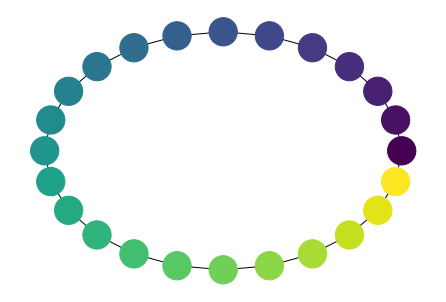

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

n = 24
G = nx.cycle_graph(n)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color=range(n), node_size=800)
plt.show()

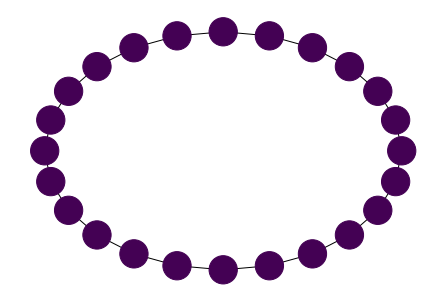

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

n = 24
G = nx.cycle_graph(n)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color=[0]*n, node_size=800)
plt.show()

In [74]:
colors = [0,1,0,1,0,0,1,0,0]
#colors = [2,2,2,2,2,2,2,2,2]

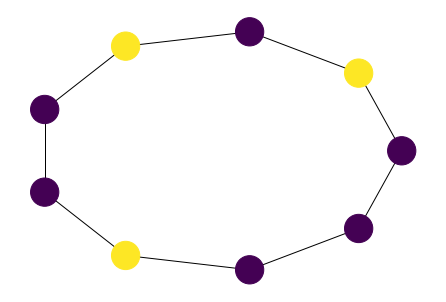

In [77]:
import matplotlib.pyplot as plt
import networkx as nx

n = 9
G = nx.cycle_graph(n)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color=colors, node_size=800)
plt.show()

- https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
- https://networkx.org/documentation/stable/auto_examples/drawing/plot_node_colormap.html?highlight=node_color
- https://stackoverflow.com/questions/31085231/set-dynamic-node-shape-in-network-with-matplotlib/31195070

# References
- https://stackoverflow.com/questions/50376066/what-tool-to-draw-an-animated-network-graph
- https://stackoverflow.com/questions/43936560/how-can-i-do-networkx-animation-for-stored-frames
- https://stellasia.github.io/blog/2020-03-07-page-rank-animation-with-networkx-numpy-and-matplotlib/
- https://youtu.be/KEG-NBVLrSg
- https://ankurankan.github.io/plotting-and-animating-networkx-graphs.html

